In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Load the Data

In [2]:

# Define the file path
file_path = '../Raw_Datasets/Gebäude Lastgang/002 Verwaltung 3.csv'

# Read the file into a DataFrame
df = pd.read_csv(file_path, sep=';',header=0,names=['DateTime','electricity','heating'])

# Display the first few rows of the DataFrame
print(df.head())

           DateTime electricity heating
0  01.01.2022 00:00  1410968,17  364228
1  01.01.2022 00:15  1410969,55  364233
2  01.01.2022 00:30  1410970,75  364238
3  01.01.2022 00:45  1410972,12  364243
4  01.01.2022 01:00  1410973,27  364248


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DateTime     35041 non-null  object
 1   electricity  35041 non-null  object
 2   heating      35041 non-null  object
dtypes: object(3)
memory usage: 821.4+ KB


In [4]:
df.describe()

,DateTime,electricity,heating
count,35041,35041,35041
unique,35037,34684,26365
top,30.10.2022 02:15,"1437337,12",431894
freq,2,353,355


In [5]:
df.count()

DateTime       35041
electricity    35041
heating        35041
dtype: int64

# add 15min differences features

In [6]:

def calculate_differences(df):
    # 确保电力和供暖列是数值类型
    df['electricity'] = df['electricity'].str.replace(',', '.').astype(float)
    df['heating'] = df['heating'].str.replace(',', '.').astype(float)
    
    # 计算差值
    df['electricity_15min_diff'] = df['electricity'].diff()
    df['heating_15min_diff'] = df['heating'].diff()
    df.fillna(0, inplace=True)
    
    return df


In [7]:
df = calculate_differences(df)


In [8]:
df.head()

,DateTime,electricity,heating,electricity_15min_diff,heating_15min_diff
0,01.01.2022 00:00,1410968.17,364228.0,0.00,0.0
1,01.01.2022 00:15,1410969.55,364233.0,1.38,5.0
2,01.01.2022 00:30,1410970.75,364238.0,1.20,5.0
3,01.01.2022 00:45,1410972.12,364243.0,1.37,5.0
4,01.01.2022 01:00,1410973.27,364248.0,1.15,5.0


In [9]:
desc = df.describe()
desc

,electricity,heating,electricity_15min_diff,heating_15min_diff
count,3.504100e+04,35041.000000,35041.000000,35041.000000
mean,1.445595e+06,427983.868226,2.011007,3.079535
std,1.917730e+04,23222.643784,2.937962,2.957011
min,1.410968e+06,364228.000000,0.000000,0.000000
25%,1.429392e+06,419497.000000,1.310000,1.000000
50%,1.445122e+06,434216.000000,1.580000,2.000000
75%,1.461589e+06,438780.000000,2.570000,6.000000
max,1.481436e+06,472138.000000,521.350000,136.000000


In [10]:
max_values = desc.loc['max']

# 找出对应列的最大值所在的行
max_rows = df[(df['electricity'] == max_values['electricity']) |
              (df['heating'] == max_values['heating']) |
              (df['electricity_15min_diff'] == max_values['electricity_15min_diff']) |
              (df['heating_15min_diff'] == max_values['heating_15min_diff'])]

In [11]:
max_rows

,DateTime,electricity,heating,electricity_15min_diff,heating_15min_diff
13662,23.05.2022 08:30,1437858.47,432030.0,521.35,136.0
35040,01.01.2023 00:00,1481435.88,472138.0,1.89,3.0


In [12]:
# # 绘制电力数据的折线图
# plt.figure(figsize=(14, 7))
# sns.lineplot(x='DateTime', y='electricity', data=df)
# plt.title('Electricity Over Time')
# plt.xlabel('DateTime')
# plt.ylabel('Electricity')
# plt.xticks(rotation=45)
# plt.show()

In [13]:
# # 绘制供暖数据的折线图
# plt.figure(figsize=(14, 7))
# sns.lineplot(x='DateTime', y='heating', data=df)
# plt.title('Heating Over Time')
# plt.xlabel('DateTime')
# plt.ylabel('Heating')
# plt.xticks(rotation=45)
# plt.show()

In [14]:
# # 绘制电力15分钟差值的折线图
# plt.figure(figsize=(14, 7))
# sns.lineplot(x='DateTime', y='electricity_15min_diff', data=df)
# plt.title('Electricity 15min Difference Over Time')
# plt.xlabel('DateTime')
# plt.ylabel('Electricity 15min Difference')
# plt.xticks(rotation=45)
# plt.show()

In [15]:
# # 绘制供暖15分钟差值的折线图
# plt.figure(figsize=(14, 7))
# sns.lineplot(x='DateTime', y='heating_15min_diff', data=df)
# plt.title('Heating 15min Difference Over Time')
# plt.xlabel('DateTime')
# plt.ylabel('Heating 15min Difference')
# plt.xticks(rotation=45)
# plt.show()

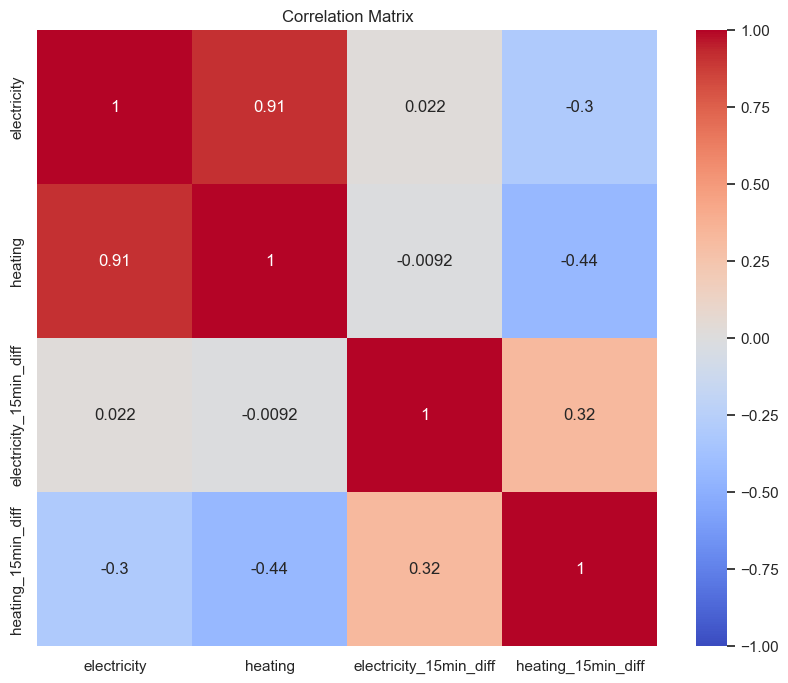

In [16]:

# 计算相关矩阵
correlation_matrix = df[['electricity', 'heating', 'electricity_15min_diff', 'heating_15min_diff']].corr()

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [17]:
df.keys()

Index(['DateTime', 'electricity', 'heating', 'electricity_15min_diff',
       'heating_15min_diff'],
      dtype='object')

In [18]:
df.set_index('DateTime', inplace=True)

In [19]:
df.index.name

'DateTime'

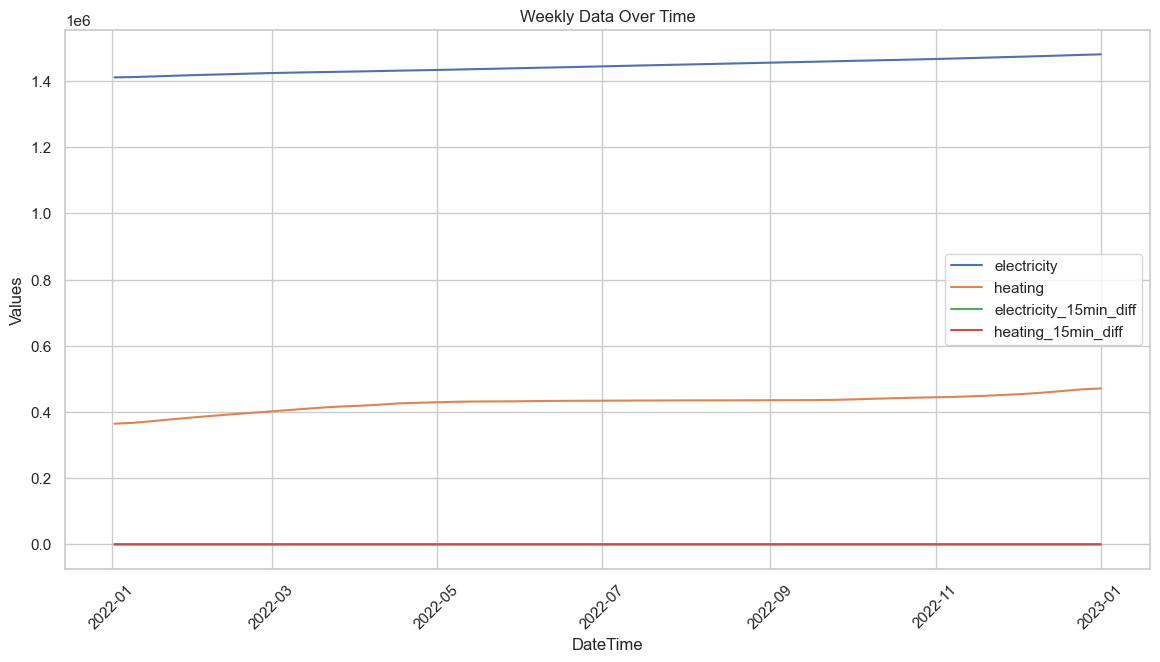

In [20]:

# Convert the index to a DatetimeIndex
df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M')

# Resample the DataFrame to weekly frequency
df_weekly = df.resample('W').mean()

# Plot each column in the DataFrame
plt.figure(figsize=(14, 7))
for column in df_weekly.columns:
    sns.lineplot(data=df_weekly, x=df_weekly.index, y=column, label=column)

plt.title('Weekly Data Over Time')
plt.xlabel('DateTime')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [21]:
df

,electricity,heating,electricity_15min_diff,heating_15min_diff
DateTime,,,,
2022-01-01 00:00:00,1410968.17,364228.0,0.00,0.0
2022-01-01 00:15:00,1410969.55,364233.0,1.38,5.0
2022-01-01 00:30:00,1410970.75,364238.0,1.20,5.0
2022-01-01 00:45:00,1410972.12,364243.0,1.37,5.0
2022-01-01 01:00:00,1410973.27,364248.0,1.15,5.0
...,...,...,...,...
2022-12-31 23:00:00,1481428.83,472127.0,2.12,3.0
2022-12-31 23:15:00,1481430.47,472129.0,1.64,2.0
2022-12-31 23:30:00,1481432.34,472132.0,1.87,3.0


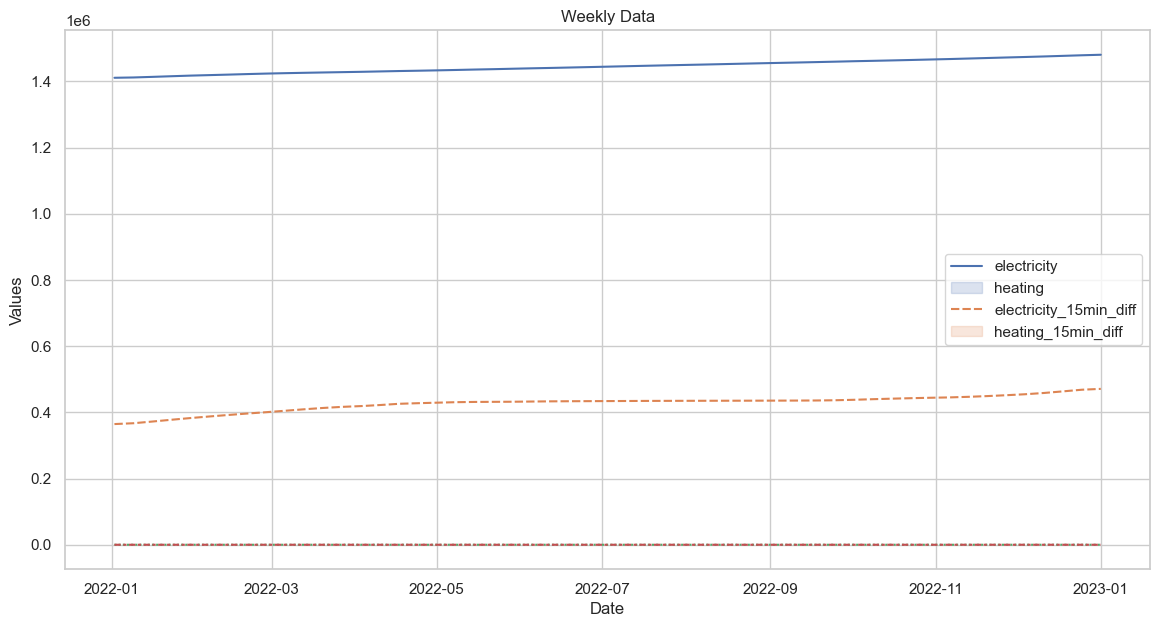

In [22]:
# Assuming df is already defined and DateTime is the index
df.index = pd.to_datetime(df.index)

# Resample the data to weekly frequency
weekly_df = df.resample('W').mean()

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_df)
plt.title('Weekly Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(labels=weekly_df.columns)
plt.show()

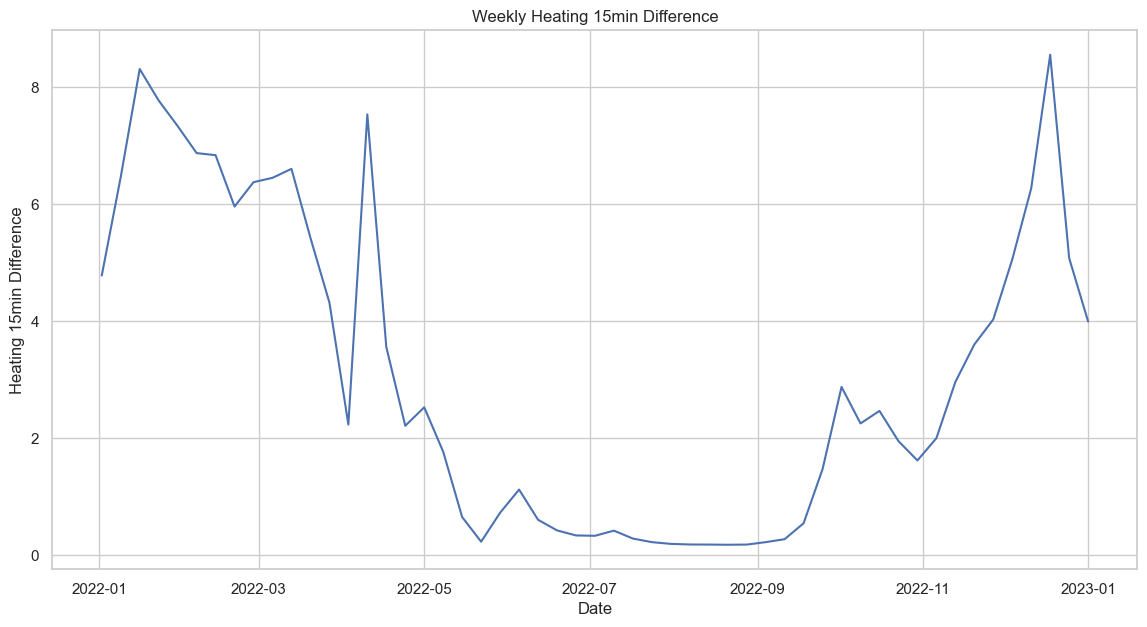

In [23]:
# Assuming df is already defined and DateTime is the index
df.index = pd.to_datetime(df.index)

# Resample the data to weekly frequency
weekly_df = df['heating_15min_diff'].resample('W').mean()

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_df)
plt.title('Weekly Heating 15min Difference')
plt.xlabel('Date')
plt.ylabel('Heating 15min Difference')
plt.show()

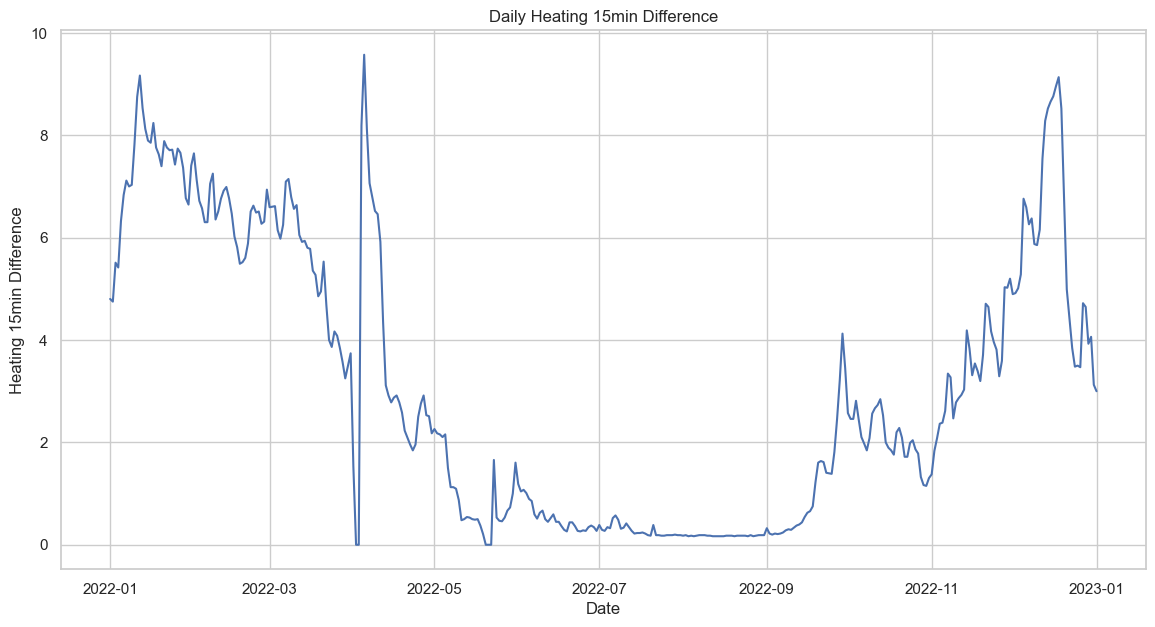

In [24]:
# Assuming df is already defined and DateTime is the index
df.index = pd.to_datetime(df.index)

# Resample the data to weekly frequency
weekly_df = df['heating_15min_diff'].resample('D').mean()

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_df)
plt.title('Daily Heating 15min Difference')
plt.xlabel('Date')
plt.ylabel('Heating 15min Difference')
plt.show()

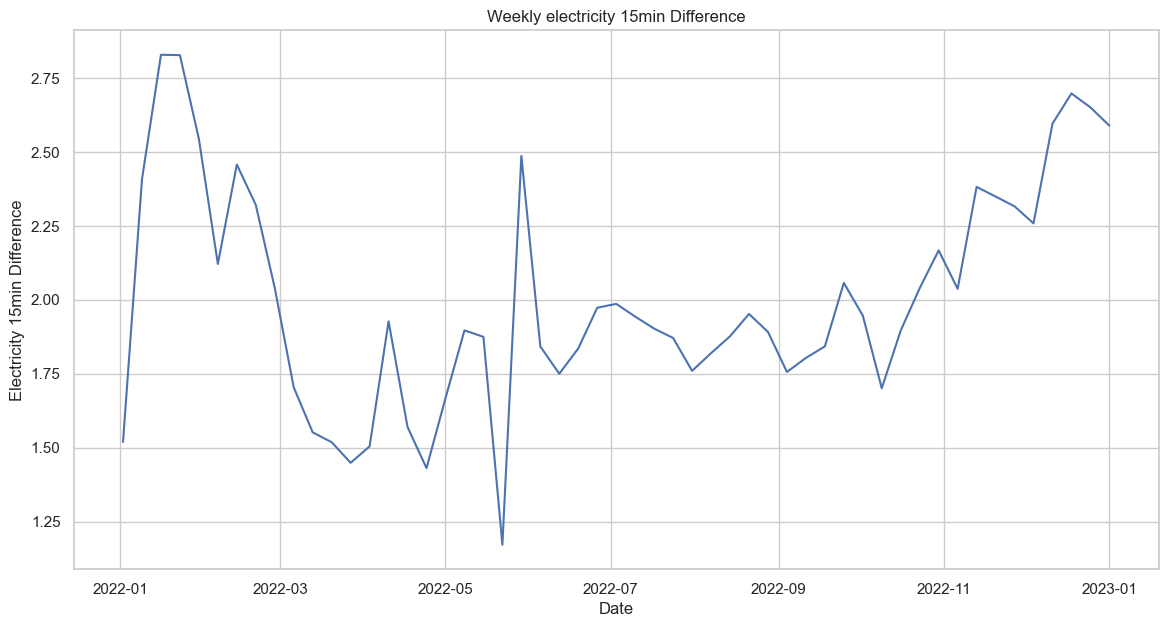

In [25]:
# Assuming df is already defined and DateTime is the index
df.index = pd.to_datetime(df.index)

# Resample the data to weekly frequency
weekly_df = df['electricity_15min_diff'].resample('W').mean()

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_df)
plt.title('Weekly electricity 15min Difference')
plt.xlabel('Date')
plt.ylabel('Electricity 15min Difference')
plt.show()

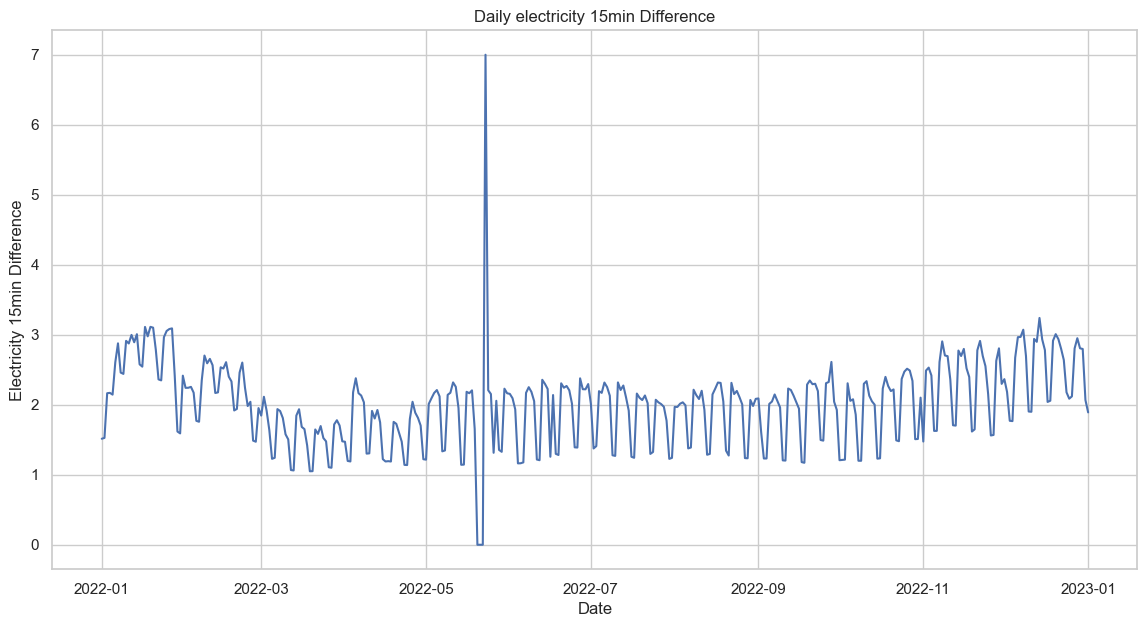

In [26]:
# Assuming df is already defined and DateTime is the index
df.index = pd.to_datetime(df.index)

# Resample the data to weekly frequency
weekly_df = df['electricity_15min_diff'].resample('D').mean()

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_df)
plt.title('Daily electricity 15min Difference')
plt.xlabel('Date')
plt.ylabel('Electricity 15min Difference')
plt.show()

In [27]:
df_export = df.drop(columns=['electricity', 'heating'])

In [28]:
df_export

,electricity_15min_diff,heating_15min_diff
DateTime,,
2022-01-01 00:00:00,0.00,0.0
2022-01-01 00:15:00,1.38,5.0
2022-01-01 00:30:00,1.20,5.0
2022-01-01 00:45:00,1.37,5.0
2022-01-01 01:00:00,1.15,5.0
...,...,...
2022-12-31 23:00:00,2.12,3.0
2022-12-31 23:15:00,1.64,2.0
2022-12-31 23:30:00,1.87,3.0


In [29]:

# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Processed_data'
output_file = os.path.join(output_folder, '002_verwaltung.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df_export.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Processed_data\002_verwaltung.csv


# Add Working Hours and Holidays

In [30]:
df

,electricity,heating,electricity_15min_diff,heating_15min_diff
DateTime,,,,
2022-01-01 00:00:00,1410968.17,364228.0,0.00,0.0
2022-01-01 00:15:00,1410969.55,364233.0,1.38,5.0
2022-01-01 00:30:00,1410970.75,364238.0,1.20,5.0
2022-01-01 00:45:00,1410972.12,364243.0,1.37,5.0
2022-01-01 01:00:00,1410973.27,364248.0,1.15,5.0
...,...,...,...,...
2022-12-31 23:00:00,1481428.83,472127.0,2.12,3.0
2022-12-31 23:15:00,1481430.47,472129.0,1.64,2.0
2022-12-31 23:30:00,1481432.34,472132.0,1.87,3.0


In [31]:
!pip install holidays

In [32]:
import holidays

DE_holidays = holidays.Germany()

def add_working_hours_and_holidays(df):
    # Convert the index to a DatetimeIndex
    df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M')

    # Add a column for whether the day is a holiday
    df['is_holiday'] = df.index.map(lambda x: x in DE_holidays or x.weekday() >= 5)

    # Add a column for the day of the week (0=Monday, 6=Sunday)
    df['day_of_week'] = df.index.dayofweek

    # Add a column for the hour of the day
    df['hour_of_day'] = df.index.hour

    # Add a column to mark working hours (9:00-17:00) on non-holiday weekdays
    df['is_working_hour'] = ((df['day_of_week'] < 5) & 
                             (df['hour_of_day'] >= 9) & 
                             (df['hour_of_day'] < 17) & 
                             (~df['is_holiday']))

    return df

df_copy = df.copy()
df_copy = add_working_hours_and_holidays(df_copy)

In [33]:
df_copy

,electricity,heating,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour
DateTime,,,,,,,,
2022-01-01 00:00:00,1410968.17,364228.0,0.00,0.0,True,5,0,False
2022-01-01 00:15:00,1410969.55,364233.0,1.38,5.0,True,5,0,False
2022-01-01 00:30:00,1410970.75,364238.0,1.20,5.0,True,5,0,False
2022-01-01 00:45:00,1410972.12,364243.0,1.37,5.0,True,5,0,False
2022-01-01 01:00:00,1410973.27,364248.0,1.15,5.0,True,5,1,False
...,...,...,...,...,...,...,...,...
2022-12-31 23:00:00,1481428.83,472127.0,2.12,3.0,True,5,23,False
2022-12-31 23:15:00,1481430.47,472129.0,1.64,2.0,True,5,23,False
2022-12-31 23:30:00,1481432.34,472132.0,1.87,3.0,True,5,23,False


In [34]:
df_with_holidays_export = df_copy.drop(columns=['electricity', 'heating'])

In [35]:

# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Processed_data'
output_file = os.path.join(output_folder, '002_verwaltung_with_holidays.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df_with_holidays_export.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Processed_data\002_verwaltung_with_holidays.csv


# Add Rolling Statistics
- simulate number of person in building based on gaussian distribution
- target temperature is 22 degree during working hours. otherwise, set indoor temperature same value  as Temperature, 
- add difference between target temperature and actual temperature

In [36]:
df_copy

,electricity,heating,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour
DateTime,,,,,,,,
2022-01-01 00:00:00,1410968.17,364228.0,0.00,0.0,True,5,0,False
2022-01-01 00:15:00,1410969.55,364233.0,1.38,5.0,True,5,0,False
2022-01-01 00:30:00,1410970.75,364238.0,1.20,5.0,True,5,0,False
2022-01-01 00:45:00,1410972.12,364243.0,1.37,5.0,True,5,0,False
2022-01-01 01:00:00,1410973.27,364248.0,1.15,5.0,True,5,1,False
...,...,...,...,...,...,...,...,...
2022-12-31 23:00:00,1481428.83,472127.0,2.12,3.0,True,5,23,False
2022-12-31 23:15:00,1481430.47,472129.0,1.64,2.0,True,5,23,False
2022-12-31 23:30:00,1481432.34,472132.0,1.87,3.0,True,5,23,False


## Simulate Number of Persons in Building
- Assume  75% area of the building is for office, 25% area is for public area
- Buidling area is 3486 m^2
- 8m^2 per person

In [37]:
# Define the building parameters
total_area = 3486  # Total building area in square meters
office_area_percentage = 0.75  # Percentage of the area designated for office
space_per_person = 8  # Space per person in square meters

# Calculate the office area
office_area = total_area * office_area_percentage

# Calculate the theoretical average number of people and convert to integer
average_people = int(office_area / space_per_person)

print(f"Theoretical average number of people in the office: {average_people}")

Theoretical average number of people in the office: 326


In [38]:
# Define the parameters for the normal distribution
mean_people = 326  # Theoretical mean number of people
std_dev_people = mean_people * 0.10  # 10% of the mean

# Generate the simulated data for working hours
working_hours_count = df_copy[df_copy['is_working_hour']].shape[0]
simulated_people = np.random.normal(loc=mean_people, scale=std_dev_people, size=working_hours_count)

# Ensure no negative values and convert to integers
simulated_people = np.clip(simulated_people, 0, None).astype(int)

# Create a new column for the number of people
df_copy['number_of_people'] = 0

# Assign the simulated data to the working hours
df_copy.loc[df_copy['is_working_hour'], 'number_of_people'] = simulated_people

# Display the DataFrame with the new column
print(df_copy[['is_working_hour', 'number_of_people']].head())

                     is_working_hour  number_of_people
DateTime                                              
2022-01-01 00:00:00            False                 0
2022-01-01 00:15:00            False                 0
2022-01-01 00:30:00            False                 0
2022-01-01 00:45:00            False                 0
2022-01-01 01:00:00            False                 0


In [39]:
df_copy

,electricity,heating,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people
DateTime,,,,,,,,,
2022-01-01 00:00:00,1410968.17,364228.0,0.00,0.0,True,5,0,False,0
2022-01-01 00:15:00,1410969.55,364233.0,1.38,5.0,True,5,0,False,0
2022-01-01 00:30:00,1410970.75,364238.0,1.20,5.0,True,5,0,False,0
2022-01-01 00:45:00,1410972.12,364243.0,1.37,5.0,True,5,0,False,0
2022-01-01 01:00:00,1410973.27,364248.0,1.15,5.0,True,5,1,False,0
...,...,...,...,...,...,...,...,...,...
2022-12-31 23:00:00,1481428.83,472127.0,2.12,3.0,True,5,23,False,0
2022-12-31 23:15:00,1481430.47,472129.0,1.64,2.0,True,5,23,False,0
2022-12-31 23:30:00,1481432.34,472132.0,1.87,3.0,True,5,23,False,0


In [40]:
df_with_counts_person = df_copy.drop(columns=['electricity', 'heating'])

In [41]:

# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Processed_data'
output_file = os.path.join(output_folder, '002_verwaltung_with_holidays_counrs_person.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df_with_counts_person.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Processed_data\002_verwaltung_with_holidays_counrs_person.csv


In [42]:
df_with_counts_person

,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people
DateTime,,,,,,,
2022-01-01 00:00:00,0.00,0.0,True,5,0,False,0
2022-01-01 00:15:00,1.38,5.0,True,5,0,False,0
2022-01-01 00:30:00,1.20,5.0,True,5,0,False,0
2022-01-01 00:45:00,1.37,5.0,True,5,0,False,0
2022-01-01 01:00:00,1.15,5.0,True,5,1,False,0
...,...,...,...,...,...,...,...
2022-12-31 23:00:00,2.12,3.0,True,5,23,False,0
2022-12-31 23:15:00,1.64,2.0,True,5,23,False,0
2022-12-31 23:30:00,1.87,3.0,True,5,23,False,0


# add hourly differences 

In [43]:

# Assuming df_copy is already defined and DateTime is the index
df_copy.index = pd.to_datetime(df_copy.index)

# Resample the data to hourly frequency
df_hourly = df_copy.resample('H').mean()

# Calculate the hourly differences
df_hourly['electricity_hourly_diff'] = df_hourly['electricity'].diff().fillna(0)
df_hourly['heating_hourly_diff'] = df_hourly['heating'].diff().fillna(0)
df_hourly

,electricity,heating,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people,electricity_hourly_diff,heating_hourly_diff
DateTime,,,,,,,,,,,
2022-01-01 00:00:00,1.410970e+06,364235.50,0.9875,3.75,1.0,5.0,0.0,0.0,0.0,0.0000,0.00
2022-01-01 01:00:00,1.410975e+06,364255.50,1.2575,5.00,1.0,5.0,1.0,0.0,0.0,5.0575,20.00
2022-01-01 02:00:00,1.410980e+06,364275.25,1.2225,5.00,1.0,5.0,2.0,0.0,0.0,4.9550,19.75
2022-01-01 03:00:00,1.410985e+06,364294.50,1.2825,4.75,1.0,5.0,3.0,0.0,0.0,5.0300,19.25
2022-01-01 04:00:00,1.410992e+06,364314.50,1.7675,5.00,1.0,5.0,4.0,0.0,0.0,6.3300,20.00
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,1.481409e+06,472095.50,2.1800,3.00,1.0,5.0,20.0,0.0,0.0,8.9575,12.00
2022-12-31 21:00:00,1.481417e+06,472107.50,1.7625,3.00,1.0,5.0,21.0,0.0,0.0,7.5575,12.00
2022-12-31 22:00:00,1.481424e+06,472119.50,1.8225,3.00,1.0,5.0,22.0,0.0,0.0,7.1250,12.00


In [44]:
df_hourly.drop(columns=['electricity', 'heating','electricity_15min_diff','heating_15min_diff'], inplace=True)

In [45]:
df_hourly.columns

Index(['is_holiday', 'day_of_week', 'hour_of_day', 'is_working_hour',
       'number_of_people', 'electricity_hourly_diff', 'heating_hourly_diff'],
      dtype='object')

In [46]:
new_columns = ['electricity_hourly_diff', 'heating_hourly_diff','is_holiday', 'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people']
df_hourly = df_hourly[new_columns]

In [47]:
df_hourly

,electricity_hourly_diff,heating_hourly_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people
DateTime,,,,,,,
2022-01-01 00:00:00,0.0000,0.00,1.0,5.0,0.0,0.0,0.0
2022-01-01 01:00:00,5.0575,20.00,1.0,5.0,1.0,0.0,0.0
2022-01-01 02:00:00,4.9550,19.75,1.0,5.0,2.0,0.0,0.0
2022-01-01 03:00:00,5.0300,19.25,1.0,5.0,3.0,0.0,0.0
2022-01-01 04:00:00,6.3300,20.00,1.0,5.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-31 20:00:00,8.9575,12.00,1.0,5.0,20.0,0.0,0.0
2022-12-31 21:00:00,7.5575,12.00,1.0,5.0,21.0,0.0,0.0
2022-12-31 22:00:00,7.1250,12.00,1.0,5.0,22.0,0.0,0.0


In [48]:
# Define the output folder and file path
output_folder = '..\\data_preprocessing\\Processed_data'
output_file = os.path.join(output_folder, '002_verwaltung_hourly_with_holidays_counrs_person.csv')

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Export the DataFrame to a CSV file
df_hourly.to_csv(output_file)

print(f"DataFrame exported to {output_file}")

DataFrame exported to ..\data_preprocessing\Processed_data\002_verwaltung_hourly_with_holidays_counrs_person.csv
